Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

Loading the Data and Preprocessing

Confusion Matrix:
 [[15  1  0]
 [ 4 18  0]
 [ 1  0 21]]
Accuracy: 0.9


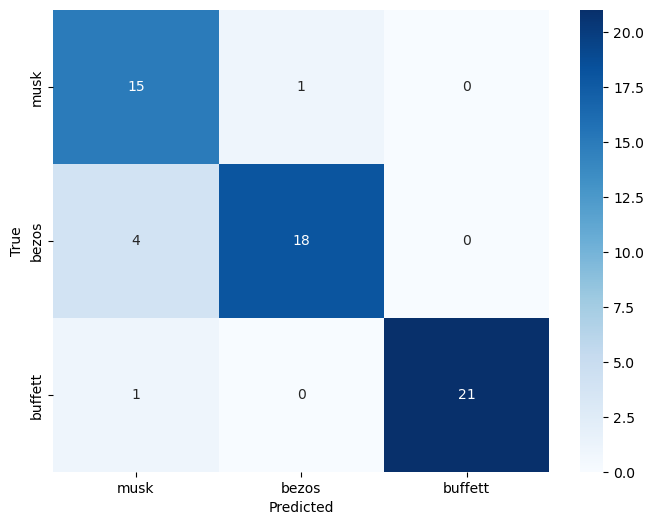

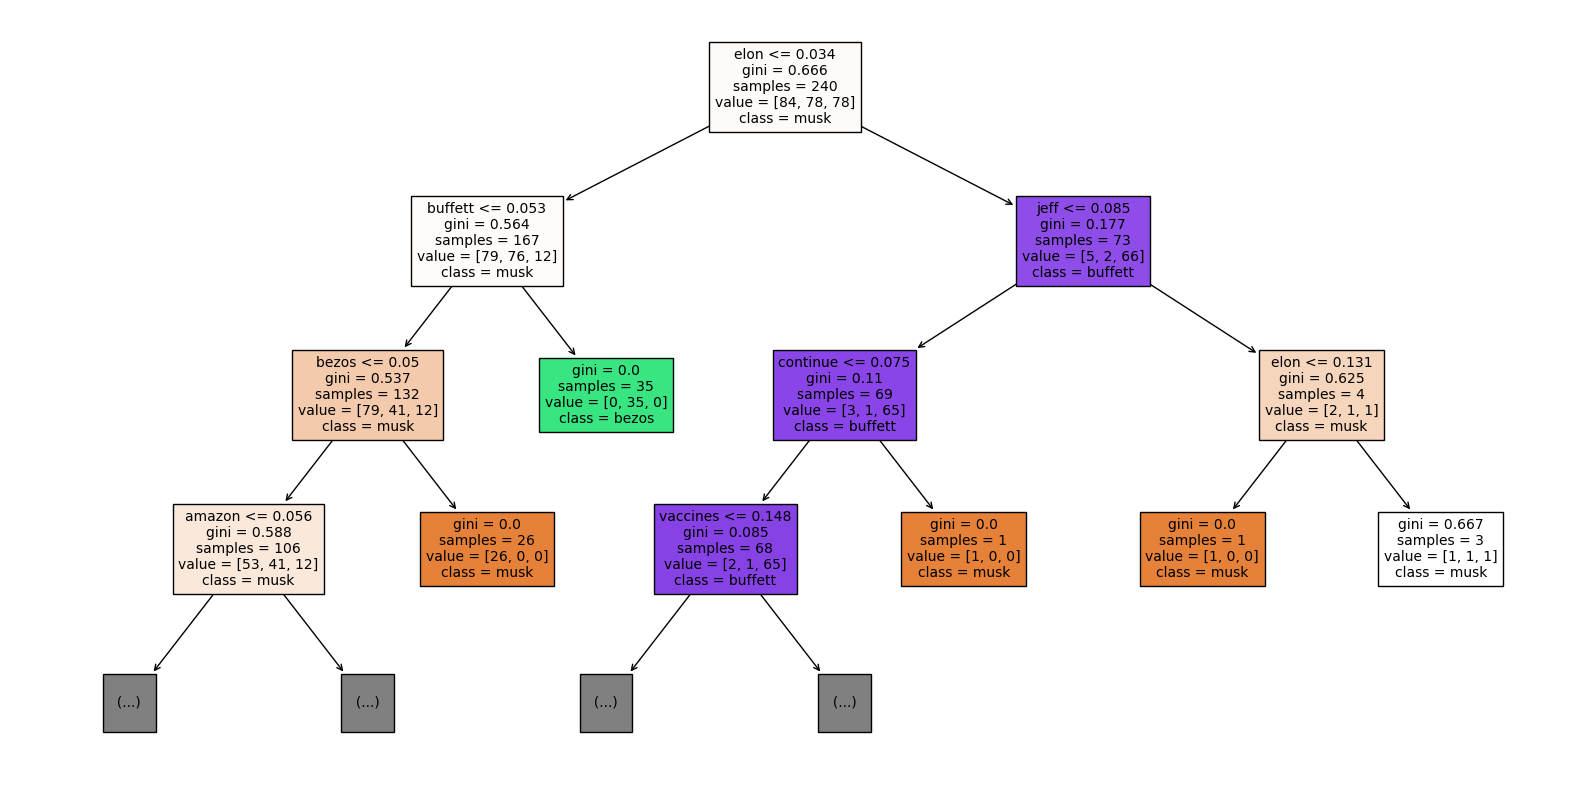

In [6]:
# Read the dataset
data = pd.read_csv("Comment_Data.csv")

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z]+', ' ', text)
    return text

# Preprocess the data
data['comment'] = data['comment'].apply(preprocess_text)

# Split the data into Training and Testing sets
X = data['comment']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_vectorized, y_train)

# Test the model on the Testing Set
y_pred_dt = dt_classifier.predict(X_test_vectorized)

# Evaluate the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy:", accuracy_dt)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['musk', 'bezos', 'buffett'], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names_out(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.show()


C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


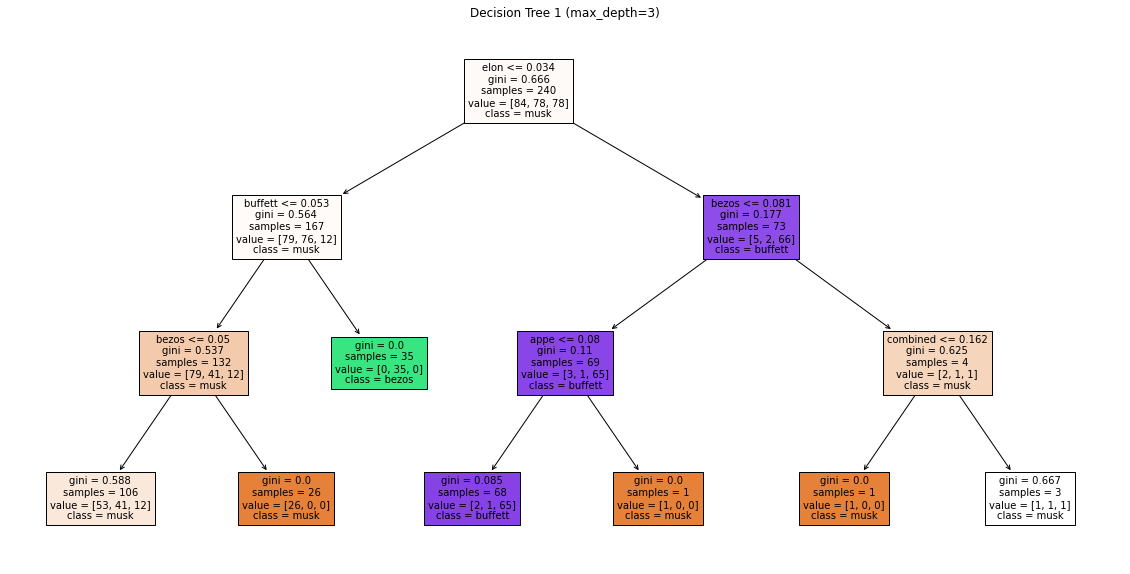

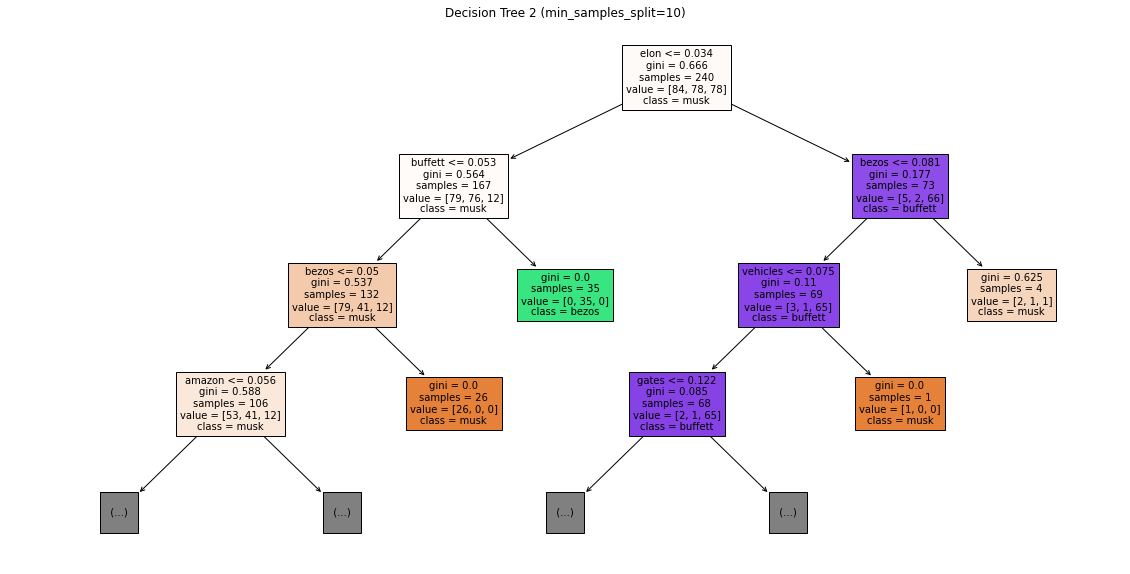

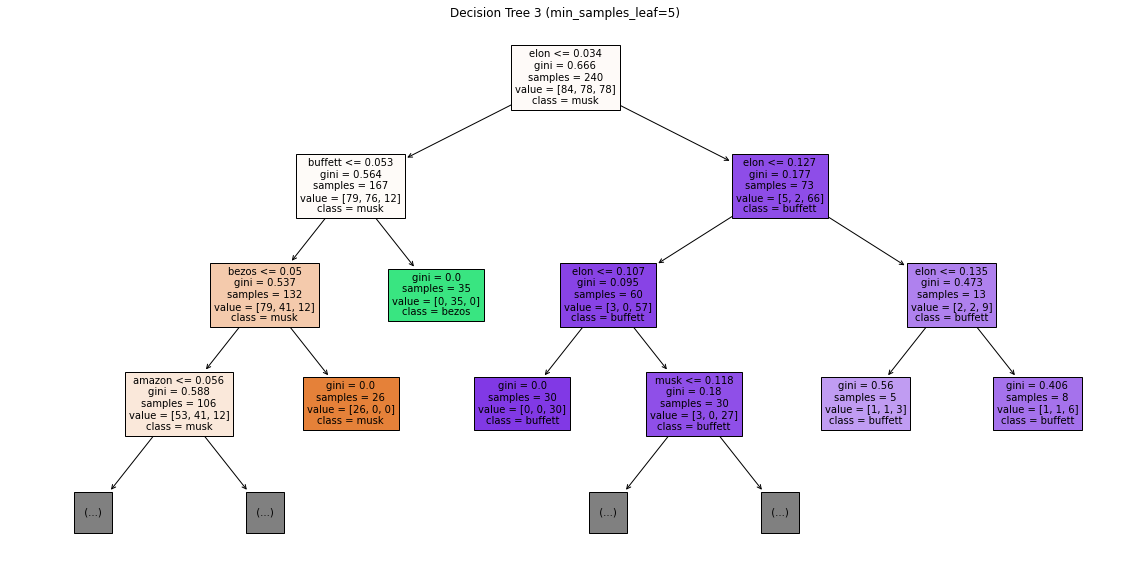

In [4]:
# Decision Tree 1: max_depth=3
dt_classifier1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier1.fit(X_train_vectorized, y_train)

# Decision Tree 2: min_samples_split=10
dt_classifier2 = DecisionTreeClassifier(min_samples_split=10, random_state=42)
dt_classifier2.fit(X_train_vectorized, y_train)

# Decision Tree 3: min_samples_leaf=5
dt_classifier3 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
dt_classifier3.fit(X_train_vectorized, y_train)

# Visualize Decision Tree 1
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier1, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 1 (max_depth=3)")
plt.show()

# Visualize Decision Tree 2
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier2, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 2 (min_samples_split=10)")
plt.show()

# Visualize Decision Tree 3
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier3, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 3 (min_samples_leaf=5)")
plt.show()


In [2]:
!pip install tensorflow


     ---------------------------------------- 0.0/272.8 MB ? eta -:--:--
     ---------------------------------------- 0.2/272.8 MB 5.0 MB/s eta 0:00:55
     --------------------------------------- 1.2/272.8 MB 12.9 MB/s eta 0:00:22
     --------------------------------------- 2.5/272.8 MB 17.5 MB/s eta 0:00:16
      -------------------------------------- 4.1/272.8 MB 22.1 MB/s eta 0:00:13
      -------------------------------------- 5.8/272.8 MB 24.7 MB/s eta 0:00:11
     - ------------------------------------- 7.0/272.8 MB 26.4 MB/s eta 0:00:11
     - ------------------------------------- 9.0/272.8 MB 27.5 MB/s eta 0:00:10
     - ------------------------------------- 9.3/272.8 MB 28.3 MB/s eta 0:00:10
     - ------------------------------------ 10.8/272.8 MB 28.4 MB/s eta 0:00:10
     - ------------------------------------ 10.8/272.8 MB 27.3 MB/s eta 0:00:10
     - ------------------------------------ 13.3/272.8 MB 29.7 MB/s eta 0:00:09
     -- ----------------------------------- 14.

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you already have the TF-IDF data in the following format:
# X_train, X_test, y_train, y_test

# Get the number of input features
input_dim = X_train.shape[1]

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy:.2f}")


IndexError: tuple index out of range

In [10]:
# Get the comments and labels
X = data['comment']
y = data['label']


In [11]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)


In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240,)
X_test shape: (60,)
y_train shape: (240,)
y_test shape: (60,)


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you already have the TF-IDF data in the following format:
# X_train, X_test, y_train, y_test

# Get the number of input features
input_dim = X_train.shape[1]

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/10


ValueError: in user code:

    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jeetp\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 240, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=True
      • mask=None


In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Get the comments and labels
X = data['comment']
y = data['label']

# Create the TF-IDF features from the comments
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Get the number of input features
input_dim = X_train.shape[1]

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(set(y)), activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

# Evaluate the model
accuracy = model.evaluate(X_test.toarray(), y_test)[1]


Epoch 1/10
8/8 [==============================] - 2s 60ms/step - loss: 1.0971 - accuracy: 0.3500 - val_loss: 1.0964 - val_accuracy: 0.3833
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 1.0856 - accuracy: 0.4833 - val_loss: 1.0904 - val_accuracy: 0.3833
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 1.0662 - accuracy: 0.6083 - val_loss: 1.0816 - val_accuracy: 0.4333
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 1.0479 - accuracy: 0.6042 - val_loss: 1.0673 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 20ms/step - loss: 1.0053 - accuracy: 0.7292 - val_loss: 1.0468 - val_accuracy: 0.5500
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.9569 - accuracy: 0.7917 - val_loss: 1.0118 - val_accuracy: 0.6833
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 0.8806 - accuracy: 0.8667 - val_loss: 0.9622 - val_accuracy: 0.7333
Epoch 8/10
8/8 [===========

2/2 [==============================] - 0s 5ms/step


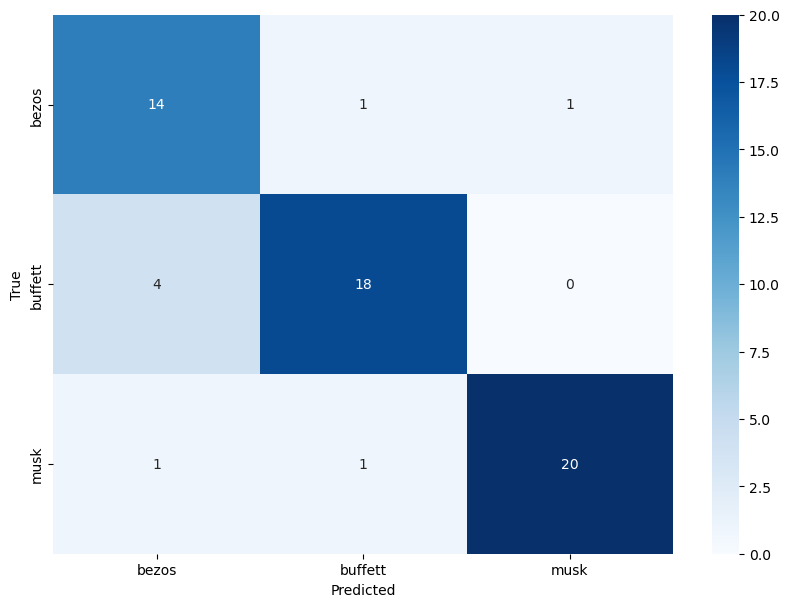

              precision    recall  f1-score   support

       bezos       0.74      0.88      0.80        16
     buffett       0.90      0.82      0.86        22
        musk       0.95      0.91      0.93        22

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.88      0.87      0.87        60



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the model predictions
y_pred = model.predict(X_test.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred_classes, target_names=encoder.classes_)
print(report)


In [22]:
# Print training data
print("Training Data:")
print(X_train.toarray())

# Print training labels
print("\nTraining Labels:")
print(y_train)

# Print testing data
print("\nTesting Data:")
print(X_test.toarray())

# Print testing labels
print("\nTesting Labels:")
print(y_test)


Training Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Training Labels:
[1 2 2 0 0 2 2 1 2 0 0 0 1 0 0 1 2 2 2 1 0 0 2 0 2 0 0 2 2 2 0 0 2 1 2 2 0
 0 1 2 1 2 2 0 1 1 0 2 0 2 0 1 2 1 1 0 0 1 0 1 2 0 0 0 0 1 2 0 0 1 0 0 0 0
 1 1 0 0 0 2 0 0 0 0 1 1 0 2 2 2 1 0 1 0 1 1 1 2 0 2 1 0 2 2 2 0 1 1 0 2 2
 1 1 2 2 1 0 2 1 0 1 2 1 1 0 1 1 0 2 2 2 0 1 1 1 2 1 1 2 1 2 0 2 1 0 1 1 0
 2 0 0 1 2 2 1 2 2 1 0 2 0 1 1 0 2 1 0 2 1 1 2 1 1 1 0 2 2 2 1 1 1 1 0 2 1
 0 0 1 1 2 0 2 0 2 0 0 2 2 1 2 2 2 1 2 2 0 1 0 1 1 2 2 0 0 1 0 0 2 2 1 1 2
 0 1 0 1 0 0 0 2 2 1 0 1 2 0 2 0 1 0]

Testing Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Testing Labels:
[1 1 0 2 1 1 0 0 2 0 1 2 1 2 0 1 1 1 0 0 2 0 1 1 0 2 1 1 0 1 2 0 2 2 1 0 2
 2 2 2 2 2 1 2 2 2 1 1 0 1 0 0 1 2 1 1 2 2 0 2]
